In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random


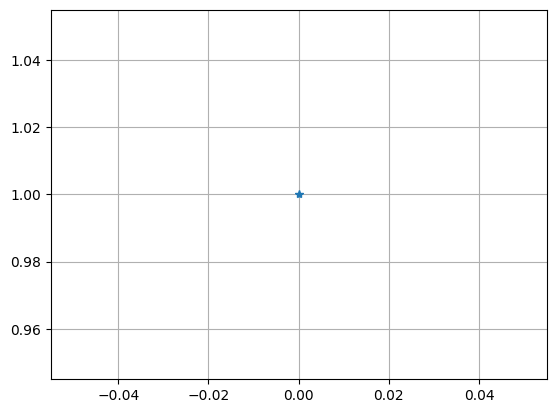

In [12]:
x = 0
y = 1
plt.plot(x, y, marker = "*")

plt.grid()
plt.show()

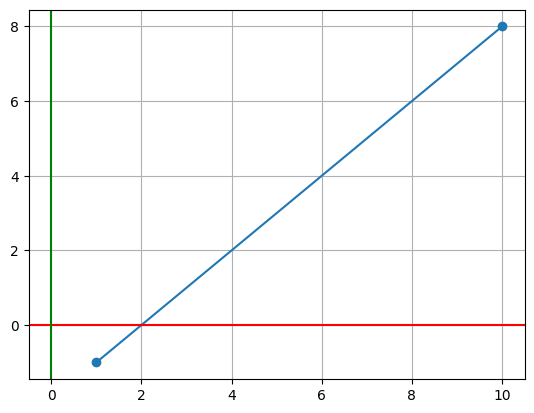

In [13]:
x = [1, 10]
y = [-1, 8]

plt.plot(x, y, marker = "o")


# Esta función la podemos usar para marcar el eje X
plt.axhline(0, color = "red")

# Esta función la podemos usar para marcar el eje Y
plt.axvline(0, color = "green") 

plt.grid()
plt.show()

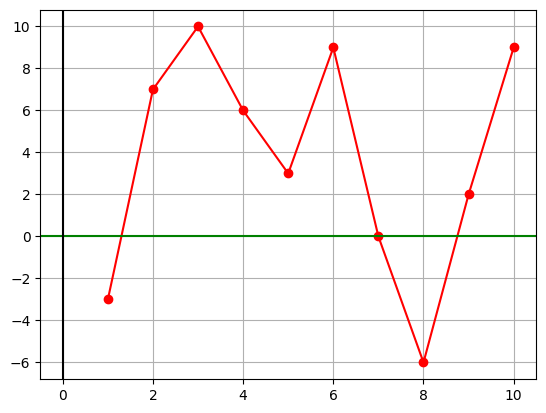

In [17]:
x = np.linspace(1, 10, 10)
y = [-3, 7, 10, 6, 3, 9, 0, -6, 2, 9]

plt.plot(x, y, marker = "o", color = "red")

# Eje X
plt.axhline(0, color = "green")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()

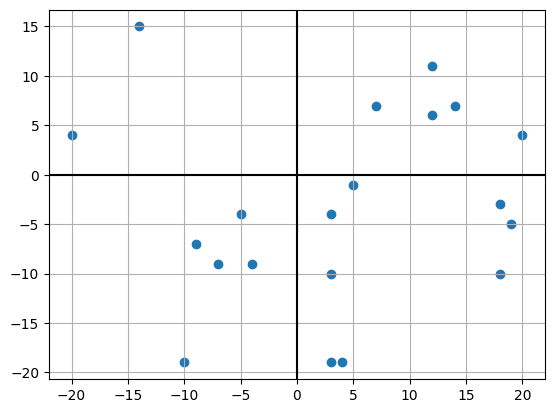

In [22]:
X = [random.randint(-20, 20) for x in range(20)]
Y = [random.randint(-20, 20) for x in range(20)]

plt.scatter(X, Y)

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()
